In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# the following make sure that tables can be displayed in an interactive way:
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import HTML

In [13]:
# read data
data = pd.read_csv("weather_data.csv")

# combine 'date' and 'time' into a single datetime column
data["datetime"] = pd.to_datetime(data["date"] + " " + data["time"])
display(HTML('<div style="max-height:300px; overflow:auto;">' + data.to_html() + '</div>'))


,date,time,air_temperature_celsius,precipitation_mm,datetime
0,2024-01-01,00:00,-16.1,0.0,2024-01-01 00:00:00
1,2024-01-01,01:00,-16.1,0.0,2024-01-01 01:00:00
2,2024-01-01,02:00,-16.0,0.0,2024-01-01 02:00:00
3,2024-01-01,03:00,-15.9,0.0,2024-01-01 03:00:00
4,2024-01-01,04:00,-16.1,0.0,2024-01-01 04:00:00
5,2024-01-01,05:00,-16.6,0.0,2024-01-01 05:00:00
6,2024-01-01,06:00,-17.0,0.0,2024-01-01 06:00:00
7,2024-01-01,07:00,-16.6,0.0,2024-01-01 07:00:00
8,2024-01-01,08:00,-16.8,0.0,2024-01-01 08:00:00
9,2024-01-01,09:00,-16.9,0.0,2024-01-01 09:00:00


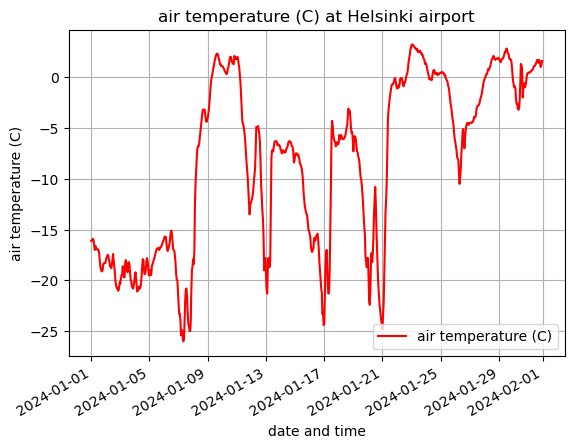

In [11]:
# set datetime as index for convenience
data = data.set_index("datetime")

# keep only january data
january = data.loc["2024-01"]

fig, ax = plt.subplots()

# temperature time series
ax.plot(
    january.index,
    january["air_temperature_celsius"],
    label="air temperature (C)",
    color="red",
)
mean_temp = sum(january["air_temperature_celsius"])/len(january["air_temperature_celsius"])
ax.set_title("air temperature (C) at Helsinki airport")
ax.set_xlabel("date and time")
ax.set_ylabel("air temperature (C)")
ax.legend()
ax.grid(True)

# format x-axis for better date display
fig.autofmt_xdate()

fig.savefig("2024-01-temperature.png")